In [1]:
import scanpy as sc
import anndata as ad
import multigrate
from random import shuffle
from scipy import sparse
from matplotlib import pyplot as plt
import gdown

In [2]:
%config InlineBackend.figure_format = 'retina'

# Load the dataset

In [3]:
gdown.download(
    'https://drive.google.com/uc?id=1oaVQ7LN5Oe8L3VPoTg_y1ak3PChLwm81',
    'gayoso2020-expressions.h5ad'
)

Downloading...
From: https://drive.google.com/uc?id=1oaVQ7LN5Oe8L3VPoTg_y1ak3PChLwm81
To: /home/aomidi/theis/multigrate/example/gayoso2020-expressions.h5ad
464MB [02:33, 3.03MB/s] 


'gayoso2020-expressions.h5ad'

In [3]:
scrna = sc.read_h5ad('gayoso2020-expressions.h5ad')
scrna

AnnData object with n_obs × n_vars = 30293 × 3999
    obs: 'batch_indices', 'n_genes', 'percent_mito', 'leiden_subclusters', 'cell_types', 'tissue', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'cell_types_colors', 'hvg', 'neighbors', 'pca', 'tissue_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [5]:
gdown.download(
    'https://drive.google.com/uc?id=1B2AR9zY6zacnFj9coQqkLmvT6UCGa9LF',
    'gayoso2020-proteins.h5ad'
)

Downloading...
From: https://drive.google.com/uc?id=1B2AR9zY6zacnFj9coQqkLmvT6UCGa9LF
To: /home/aomidi/theis/multigrate/example/gayoso2020-proteins.h5ad
57.3MB [00:20, 2.82MB/s]


'gayoso2020-proteins.h5ad'

In [4]:
cite = sc.read_h5ad('gayoso2020-proteins.h5ad')
cite

AnnData object with n_obs × n_vars = 30293 × 110
    obs: 'batch_indices', 'n_genes', 'percent_mito', 'leiden_subclusters', 'cell_types', 'tissue', 'batch'
    var: 'n_cells'
    uns: 'batch_colors', 'cell_types_colors', 'neighbors', 'pca', 'tissue_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

## Data Cleaning

TODO: do this in the preprocessing notebook

In [5]:
scrna = scrna[scrna.obs['batch'].isin(['SLN111-D1', 'SLN208-D2'])]
cite = cite[cite.obs['batch'].isin(['SLN111-D1', 'SLN208-D2'])]

/home/aomidi/.conda/envs/seurat/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [6]:
scrna.obs = scrna.obs.rename(columns={'cell_types': 'cell_type'})
cite.obs = cite.obs.rename(columns={'cell_types': 'cell_type'})

In [7]:
scrna1 = scrna[scrna.obs['batch'] == 'SLN111-D1']
scrna2 = scrna[scrna.obs['batch'] == 'SLN208-D2']

In [8]:
scrna1

View of AnnData object with n_obs × n_vars = 8658 × 3999
    obs: 'batch_indices', 'n_genes', 'percent_mito', 'leiden_subclusters', 'cell_type', 'tissue', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'cell_types_colors', 'hvg', 'neighbors', 'pca', 'tissue_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [9]:
scrna2

View of AnnData object with n_obs × n_vars = 6587 × 3999
    obs: 'batch_indices', 'n_genes', 'percent_mito', 'leiden_subclusters', 'cell_type', 'tissue', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'cell_types_colors', 'hvg', 'neighbors', 'pca', 'tissue_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [10]:
cite1 = cite[cite.obs['batch'] == 'SLN111-D1']
cite2 = cite[cite.obs['batch'] == 'SLN208-D2']

In [11]:
cite1

View of AnnData object with n_obs × n_vars = 8658 × 110
    obs: 'batch_indices', 'n_genes', 'percent_mito', 'leiden_subclusters', 'cell_type', 'tissue', 'batch'
    var: 'n_cells'
    uns: 'batch_colors', 'cell_types_colors', 'neighbors', 'pca', 'tissue_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [12]:
cite2

View of AnnData object with n_obs × n_vars = 6587 × 110
    obs: 'batch_indices', 'n_genes', 'percent_mito', 'leiden_subclusters', 'cell_type', 'tissue', 'batch'
    var: 'n_cells'
    uns: 'batch_colors', 'cell_types_colors', 'neighbors', 'pca', 'tissue_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

## Configure and train the model

In [13]:
# paired
model = multigrate.models.MultiVAE(
    adatas=[[scrna1, scrna2], [cite1, cite2]],
    names=[['scRNAseq-SLN111D1', 'scRNAseq-SLN208D2'], ['scCITEseq-SLN111-D1', 'scCITEseq-SLN208D2']],
    pair_groups=[[0, 1], [0, 1]],
    z_dim=20,
    h_dim=128,
    hiddens=[[], []],
    output_activations=['linear', 'linear'],
    shared_hiddens=[],
    adver_hiddens=[],
    recon_coef=1,
    kl_coef=1e-3,
    integ_coef=1e-1,
    cycle_coef=0,
    adversarial=False,
    dropout=0.2,
)

In [14]:
model.train(
    n_iters=50000,
    batch_size=64,
    lr=3e-4,
    val_split=0.1,
    adv_iters=0,
    kl_anneal_iters=20000,
    validate_every=5000,
    verbose=1
)

 |████████████████████| 100.0% iter=50000/50000, time=472.66(s), loss=0.6207, recon=0.4526, kl=85.5446, integ=0.8259, cycle=1.4815, val_loss=0.5876, val_recon=0.4165, val_kl=85.0549, val_integ=0.8605, val_cycle=1.32096

## Plot training history

In [15]:
model.history

,iteration,train_loss,train_recon,train_kl,train_integ,train_cycle,val_loss,val_recon,val_kl,val_integ,val_cycle
0,5000,0.703849,0.530270,146.182809,1.495273,1.771060,0.530914,0.432681,170.915615,0.555038,1.409635
1,10000,0.593441,0.489711,141.464803,0.481046,1.594446,0.537351,0.423793,125.264099,0.509253,1.349573
2,15000,0.607531,0.472768,106.512393,0.659521,1.538806,0.565891,0.421822,99.424901,0.695004,1.343696
3,20000,0.631658,0.470500,89.422270,0.808915,1.550106,0.592683,0.422009,84.012634,0.866621,1.345405
4,25000,0.627493,0.458178,84.517699,0.847972,1.501696,0.590041,0.420916,83.539664,0.855851,1.341725
5,30000,0.626045,0.458470,84.278671,0.832963,1.493800,0.588300,0.418890,83.586025,0.858233,1.331257
6,35000,0.625493,0.459766,84.911633,0.808159,1.503393,0.589862,0.418477,84.695940,0.866889,1.332414
7,40000,0.615889,0.449341,85.111803,0.814361,1.464088,0.590231,0.419548,83.978751,0.867037,1.340661
8,45000,0.620397,0.453548,85.207312,0.816416,1.472030,0.587217,0.416703,84.732352,0.857817,1.318196
9,49999,0.620705,0.452566,85.544644,0.825950,1.481492,0.587602,0.416495,85.054888,0.860519,1.320874


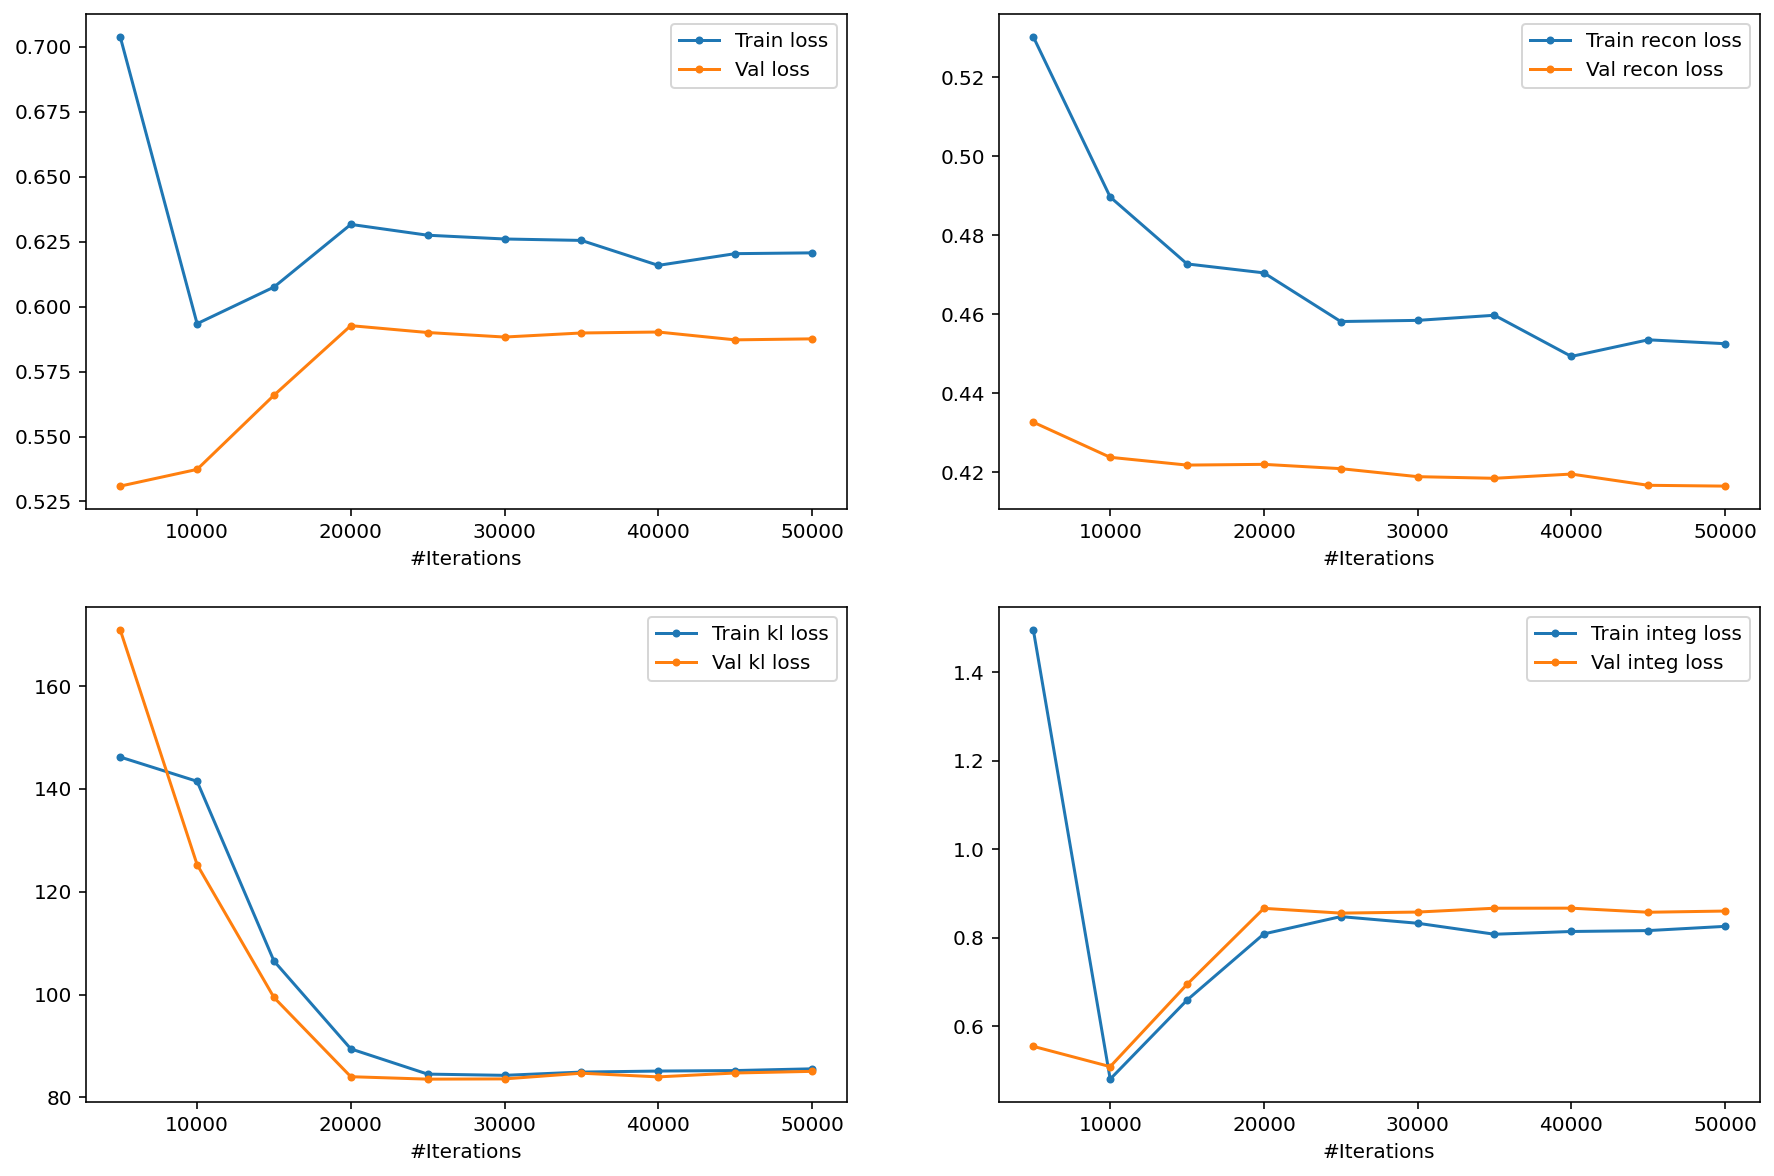

In [16]:
plt.figure(figsize=(15, 10));
plt.subplot(221);
plt.plot(model.history['iteration'], model.history['train_loss'], '.-', label='Train loss');
plt.plot(model.history['iteration'], model.history['val_loss'], '.-', label='Val loss');
plt.xlabel('#Iterations');
plt.legend();

plt.subplot(222);
plt.plot(model.history['iteration'], model.history['train_recon'], '.-', label='Train recon loss');
plt.plot(model.history['iteration'], model.history['val_recon'], '.-', label='Val recon loss');
plt.xlabel('#Iterations');
plt.legend();

plt.subplot(223);
plt.plot(model.history['iteration'], model.history['train_kl'], '.-', label='Train kl loss');
plt.plot(model.history['iteration'], model.history['val_kl'], '.-', label='Val kl loss');
plt.xlabel('#Iterations');
plt.legend();

plt.subplot(224);
plt.plot(model.history['iteration'], model.history['train_integ'], '.-', label='Train integ loss');
plt.plot(model.history['iteration'], model.history['val_integ'], '.-', label='Val integ loss');
plt.xlabel('#Iterations');
plt.legend();

## Recover and visualize the latent space

In [10]:
z = model.predict(
    adatas=[[scrna1, scrna2], [cite1, cite2]],
    names=[['scRNAseq-SLN111D1', 'scRNAseq-SLN208D2'], ['scCITEseq-SLN111-D1', 'scCITEseq-SLN208D2']],
    batch_size=64,
)
z

/home/aomidi/.conda/envs/seurat/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


AnnData object with n_obs × n_vars = 60586 × 20
    obs: 'modality', 'cell_type', 'batch'

In [11]:
sc.pp.neighbors(z)
sc.tl.umap(z)

... storing 'modality' as categorical
... storing 'cell_type' as categorical


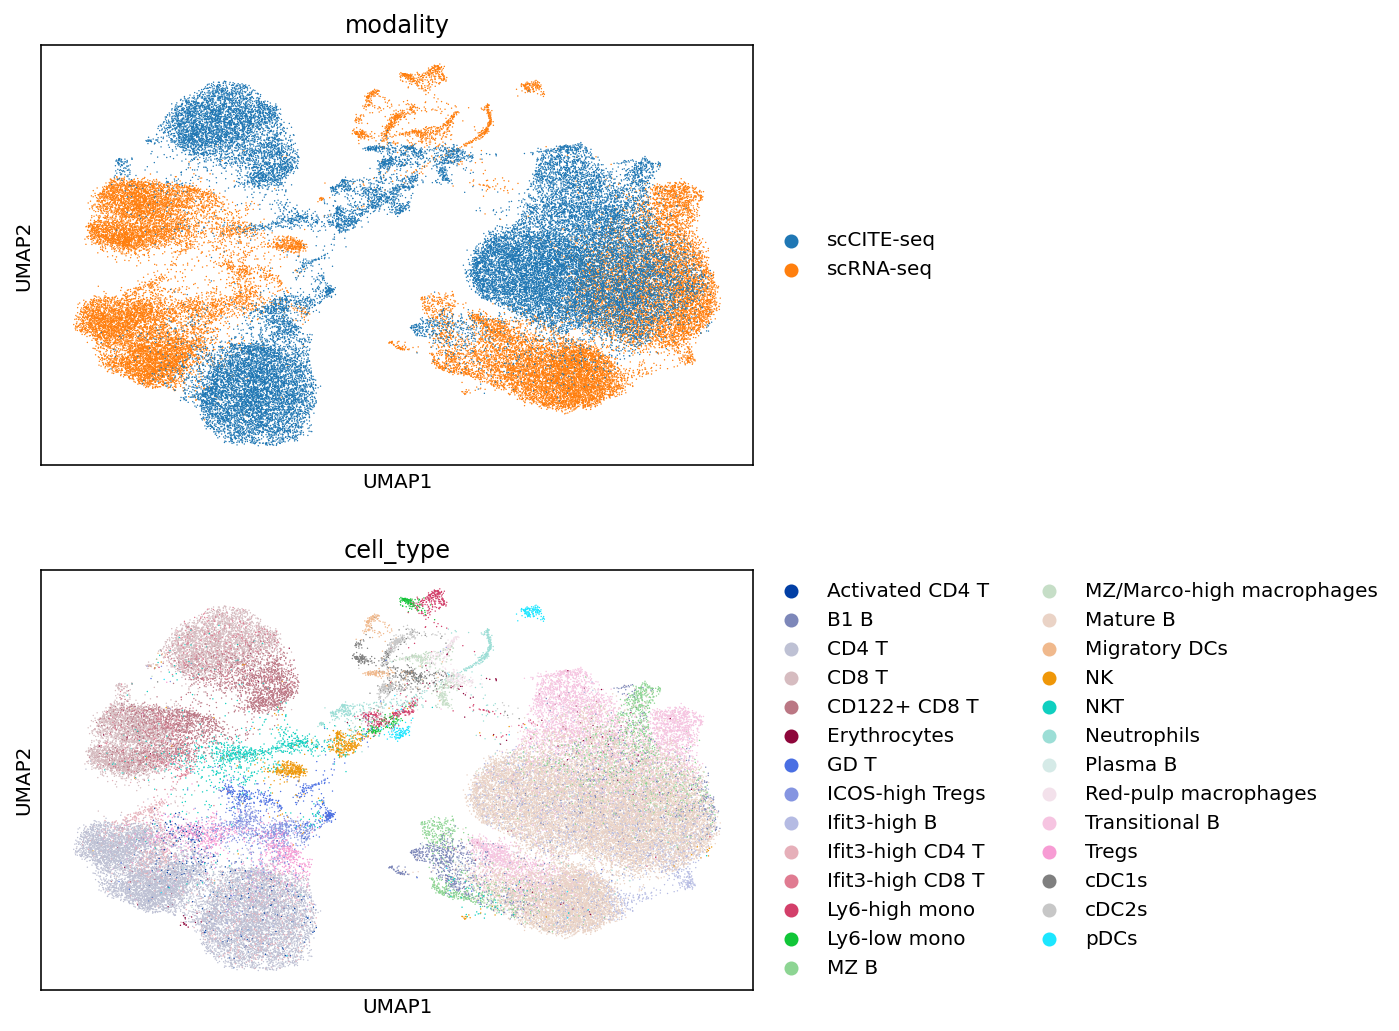

In [12]:
sc.pl.umap(z, color=['modality', 'cell_type'], ncols=1)

## Metrics

In [ ]:
sc.pp.pca(z)
metrics = multigrate.metrics.metrics(
    z, z,
    batch_key='modality',
    label_key='cell_type',
    method='multigrate'
)
metrics

Clustering...
ASW label/batch...


/home/aomidi/.conda/envs/seurat/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/aomidi/.conda/envs/seurat/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/aomidi/.conda/envs/seurat/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/aomidi/.conda/envs/seurat/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_catego

PCR batch...
Graph connectivity...
ASW label...


/home/aomidi/.conda/envs/seurat/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/aomidi/.conda/envs/seurat/lib/python3.7/site-packages/multigrate-0.1.0-py3.7.egg/multigrate/metrics.py:548: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  _,labs = connected_components(adata_post_sub.uns['neighbors']['connectivities'], connection='strong')


NMI cluster/label...
ARI cluster/label...
Isolated label silhouette...
